#Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each
- K-Means Clustering is a partition-based clustering algorithm where the number of clusters (K) must be specified in advance. It groups data points by minimizing the distance between points and their cluster centroids. K-Means is computationally efficient and works well with large datasets, but it is sensitive to the initial placement of centroids and performs best when clusters are well-defined and spherical in shape.

Hierarchical Clustering is a tree-based clustering method that does not require the number of clusters to be predefined. It builds a hierarchy of clusters using either a bottom-up (agglomerative) or top-down (divisive) approach. The results are represented using a dendrogram, which helps visualize relationships between clusters. However, hierarchical clustering is computationally expensive and less suitable for very large datasets.

Use Cases

Use Case of K-Means Clustering:
K-Means is commonly used in customer segmentation, where customers are grouped based on features such as age, income, and purchasing behavior. Since businesses often decide the number of customer segments beforehand and deal with large datasets, K-Means is an efficient choice.

Use Case of Hierarchical Clustering:
Hierarchical clustering is widely used in gene expression analysis, where scientists analyze similarities between genes to understand biological relationships. Since the number of clusters is not known in advance and interpretability is important, hierarchical clustering is preferred.

#Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
-The Silhouette Score is used to evaluate the quality of clustering by measuring how well each data point fits within its assigned cluster compared to other clusters. It helps determine how clearly the data has been clustered.

For each data point, the Silhouette Score considers two factors:

Cohesion, which measures how close the data point is to other points in the same cluster.

Separation, which measures how far the data point is from points in the nearest neighboring cluster.

The Silhouette Score ranges from –1 to +1:

A value close to +1 indicates that the data point is well clustered.

A value around 0 suggests overlapping clusters.

A negative value indicates that the data point may have been assigned to the wrong cluster.

#Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups data points based on how closely they are packed together. The clustering process is mainly controlled by two core parameters:

1. Epsilon (ε)
Epsilon defines the maximum distance between two data points for them to be considered neighbors.

A small ε value results in many small clusters and may label more points as noise.

A large ε value leads to fewer, larger clusters and may merge distinct clusters together.

2. Minimum Points (MinPts)
MinPts specifies the minimum number of data points required within an ε-neighborhood for a point to be considered a core point.

A higher MinPts value makes the algorithm more conservative, identifying only dense regions as clusters.

A lower MinPts value allows clusters to form more easily, but may include noise points.

Influence on the Clustering Process
Based on ε and MinPts, DBSCAN classifies points as core points, border points, or noise points. Core points form the backbone of clusters, border points lie on the edges of clusters, and noise points are outliers. Together, these parameters allow DBSCAN to discover clusters of arbitrary shape and effectively handle noise in the data.

#Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
- Feature scaling is important in clustering algorithms because these methods rely on distance calculations to group data points. When features are measured on different scales, variables with larger numerical ranges can dominate the distance computation and distort the clustering results.

In K-Means, clustering is based on minimizing the distance between data points and cluster centroids. If one feature (e.g., annual income) has a much larger range than another feature (e.g., age), the algorithm will give more importance to the larger-scale feature, leading to biased and incorrect clusters.

In DBSCAN, feature scaling is equally important because the ε (epsilon) parameter defines the neighborhood radius using distance metrics. If features are not scaled, ε may become ineffective, causing the algorithm to either group unrelated points together or label many points as noise.

Therefore, feature scaling ensures that all features contribute equally to distance calculations, leading to more accurate, meaningful, and reliable clustering results. Common scaling techniques include Standardization (Z-score normalization) and Min-Max normalization.

#Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
- The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means clustering. It works by analyzing how the clustering performance changes as the number of clusters increases.

In K-Means, clustering quality is measured using Within-Cluster Sum of Squares (WCSS), which represents the total distance between data points and their respective cluster centroids. As the value of K increases, WCSS decreases because data points are closer to their centroids.

The Elbow Method involves plotting WCSS against different values of K. Initially, WCSS decreases sharply, but after a certain point, the rate of decrease slows down. This point creates a noticeable “elbow” in the graph.

The value of K at the elbow point is considered optimal because adding more clusters beyond this point does not significantly improve clustering performance. Thus, the Elbow Method helps balance model simplicity and clustering accuracy.

#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers. (Include your Python code and output in the code box below.)
-

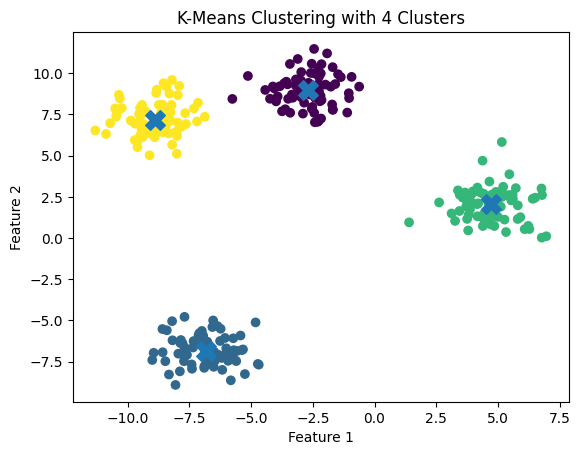

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=300, centers=4, random_state=42)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_


plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-Means Clustering with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
# Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
#(Include your Python code and output in the code box below.)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)



Number of clusters found (excluding noise): 0


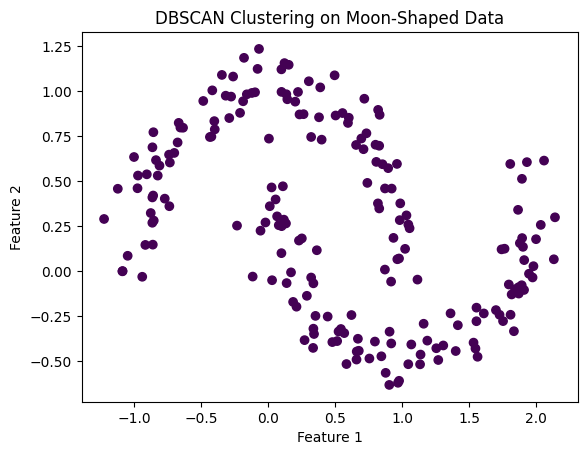

In [4]:
#Question 8: Generate moon-shaped synthetic data using
#make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
#the plot.

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

outliers = labels == -1
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers])
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', marker='x')
plt.title("DBSCAN Clustering on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


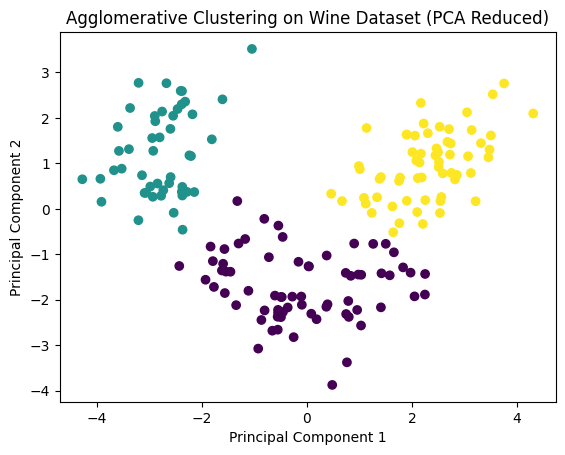

In [5]:
#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
#Agglomerative Clustering and visualize the result in 2D with a scatter plot.
#(Include your Python code and output in the code box below.)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering: ● Which clustering algorithm(s) would you use and why? ● How would you preprocess the data (missing values, scaling)? ● How would you determine the number of clusters? ● How would the marketing team benefit from your clustering analysis? (Include your Python code and output in the code box below.)
- 1. Clustering Algorithm Selection

I would primarily use K-Means clustering for customer segmentation because:

It works well with large datasets, which are common in e-commerce

It produces clearly interpretable clusters

Marketing teams usually prefer a fixed number of customer segments (e.g., budget buyers, premium buyers, frequent shoppers)

As a secondary approach, DBSCAN can be used to detect outliers or abnormal customers (e.g., fraudulent or extremely rare buying behavior).

2. Data Preprocessing

Before clustering, the data must be prepared carefully:

Missing values:

Numerical features → filled using mean/median

Categorical features → filled using mode

Encoding categorical variables:

Convert categories (e.g., gender, region) using One-Hot Encoding

Feature scaling:

Apply StandardScaler so that all features contribute equally to distance calculations

Feature selection:

Use relevant variables such as purchase frequency, total spend, category-wise spend, and age

3. Determining the Number of Clusters

To find the optimal number of clusters:

Use the Elbow Method to analyze WCSS (Within-Cluster Sum of Squares)

Use the Silhouette Score to evaluate cluster separation quality

Choose the number of clusters where both methods indicate good structure

4. Business Value for the Marketing Team

The marketing team benefits in several ways:

Personalized promotions for each customer segment

Higher conversion rates and customer engagement

Better allocation of marketing budget

Identification of high-value and at-risk customers

Improved customer retention strategies

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample customer data (simulated)
data = {
    'Age': [25, 34, 45, 23, 52, 46, 30, 40],
    'Annual_Spend': [2000, 4500, 8000, 1500, 10000, 8200, 3000, 6000],
    'Purchase_Frequency': [12, 20, 35, 10, 40, 38, 15, 25]
}

df = pd.DataFrame(data)

# Handle missing values (example)
df.fillna(df.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Evaluate clustering
sil_score = silhouette_score(scaled_data, labels)

print("Cluster Labels:", labels)
print("Silhouette Score:", sil_score)

Cluster Labels: [1 2 0 1 0 0 1 2]
Silhouette Score: 0.5590655912390402
